In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
action1_path = "../data/JData_Action_201602.csv"
action2_path = "../data/JData_Action_201603.csv"
action3_path = "../data/JData_Action_201604.csv"
comment_path = "../data/JData_Comment.csv"
product_path = "../data/JData_Product.csv"
user_path = "../data/JData_User.csv"

## Action Table

In [3]:
action1_df = pd.read_csv(action1_path,dtype={'user_id': np.int64},parse_dates=[2])
action2_df = pd.read_csv(action2_path,dtype={'user_id': np.int64},parse_dates=[2])
action3_df = pd.read_csv(action3_path,dtype={'user_id': np.int64},parse_dates=[2])
action_df = pd.concat([action1_df, action2_df, action3_df],ignore_index=True)
action_df.head()

,user_id,sku_id,time,model_id,type,cate,brand
0,266079,138778,2016-01-31 23:59:02,NaN,1,8,403
1,266079,138778,2016-01-31 23:59:03,0.0,6,8,403
2,200719,61226,2016-01-31 23:59:07,NaN,1,8,30
3,200719,61226,2016-01-31 23:59:08,0.0,6,8,30
4,263587,72348,2016-01-31 23:59:08,NaN,1,5,159


In [4]:
action_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50601736 entries, 0 to 50601735
Data columns (total 7 columns):
user_id     int64
sku_id      int64
time        datetime64[ns]
model_id    float64
type        int64
cate        int64
brand       int64
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 2.6 GB


In [11]:
action_df.describe()

,user_id,sku_id,model_id,type,cate,brand
count,5.060174e+07,5.060174e+07,2.994584e+07,5.060174e+07,5.060174e+07,5.060174e+07
mean,2.512444e+05,8.340089e+04,9.247641e+01,4.059689e+00,6.548271e+00,4.327459e+02
std,3.002979e+04,4.966677e+04,1.024518e+02,2.417952e+00,1.780178e+00,2.421404e+02
min,2.000010e+05,2.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00
25%,2.254920e+05,4.033600e+04,0.000000e+00,1.000000e+00,5.000000e+00,2.140000e+02
50%,2.497030e+05,7.961600e+04,2.600000e+01,6.000000e+00,7.000000e+00,4.740000e+02
75%,2.771030e+05,1.267910e+05,2.160000e+02,6.000000e+00,8.000000e+00,6.230000e+02
max,3.053210e+05,1.712250e+05,3.480000e+02,6.000000e+00,1.100000e+01,9.230000e+02


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93bcc25390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f93a8dd8290>]], dtype=object)

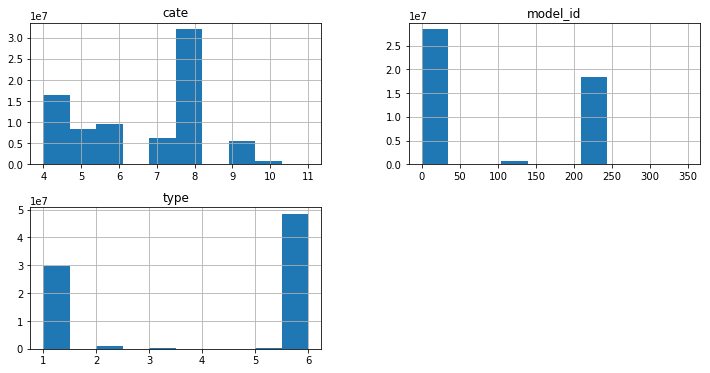

In [13]:
action_df[['model_id','type','cate']].hist(figsize=[12,6])

## Comment Table

In [14]:
comment_df = pd.read_csv(comment_path,parse_dates=[0])

In [15]:
comment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558552 entries, 0 to 558551
Data columns (total 5 columns):
dt                  558552 non-null datetime64[ns]
sku_id              558552 non-null int64
comment_num         558552 non-null int64
has_bad_comment     558552 non-null int64
bad_comment_rate    558552 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 21.3 MB


In [113]:
comment_df.head()

,dt,sku_id,comment_num,has_bad_comment,bad_comment_rate
0,2016-02-01,1000,3,1,0.0417
1,2016-02-01,10000,2,0,0.0000
2,2016-02-01,100011,4,1,0.0376
3,2016-02-01,100018,3,0,0.0000
4,2016-02-01,100020,3,0,0.0000


In [112]:
comment_df.dt.unique()

array(['2016-02-01T00:00:00.000000000', '2016-02-08T00:00:00.000000000',
       '2016-02-15T00:00:00.000000000', '2016-02-22T00:00:00.000000000',
       '2016-02-29T00:00:00.000000000', '2016-03-07T00:00:00.000000000',
       '2016-03-14T00:00:00.000000000', '2016-03-21T00:00:00.000000000',
       '2016-03-28T00:00:00.000000000', '2016-04-04T00:00:00.000000000',
       '2016-04-11T00:00:00.000000000', '2016-04-15T00:00:00.000000000'], dtype='datetime64[ns]')

In [5]:
comment_df.describe()

,sku_id,comment_num,has_bad_comment,bad_comment_rate
count,558552.000000,558552.000000,558552.000000,558552.000000
mean,85830.172260,2.579720,0.475469,0.049993
std,49359.214063,1.163774,0.499398,0.130580
min,8.000000,0.000000,0.000000,0.000000
25%,43224.000000,2.000000,0.000000,0.000000
50%,85892.000000,3.000000,0.000000,0.000000
75%,128624.000000,4.000000,1.000000,0.046500
max,171225.000000,4.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac2817e390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fac27f61ad0>]], dtype=object)

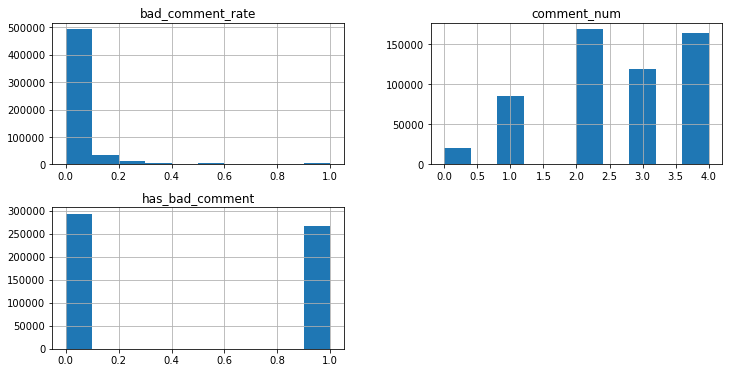

In [27]:
comment_df[['comment_num','has_bad_comment','bad_comment_rate']].hist(figsize=[12,6])

## Product Table

In [5]:
product_df = pd.read_csv(product_path)
product_df.head()

,sku_id,a1,a2,a3,cate,brand
0,10,3,1,1,8,489
1,100002,3,2,2,8,489
2,100003,1,-1,-1,8,30
3,100006,1,2,1,8,545
4,10001,-1,1,2,8,244


In [6]:
product_df.describe()

,sku_id,a1,a2,a3,cate,brand
count,24187.000000,24187.000000,24187.000000,24187.000000,24187.0,24187.000000
mean,85398.737421,2.176996,0.938975,1.179766,8.0,435.864307
std,49238.799482,1.176116,0.969517,1.045883,0.0,225.749190
min,6.000000,-1.000000,-1.000000,-1.000000,8.0,3.000000
25%,42476.000000,1.000000,1.000000,1.000000,8.0,214.000000
50%,85616.000000,3.000000,1.000000,1.000000,8.0,489.000000
75%,127774.000000,3.000000,2.000000,2.000000,8.0,571.000000
max,171224.000000,3.000000,2.000000,2.000000,8.0,922.000000


In [17]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24187 entries, 0 to 24186
Data columns (total 6 columns):
sku_id    24187 non-null int64
attr1     24187 non-null int64
attr2     24187 non-null int64
attr3     24187 non-null int64
cate      24187 non-null int64
brand     24187 non-null int64
dtypes: int64(6)
memory usage: 1.1 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac27e8c210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fac27c22c10>]], dtype=object)

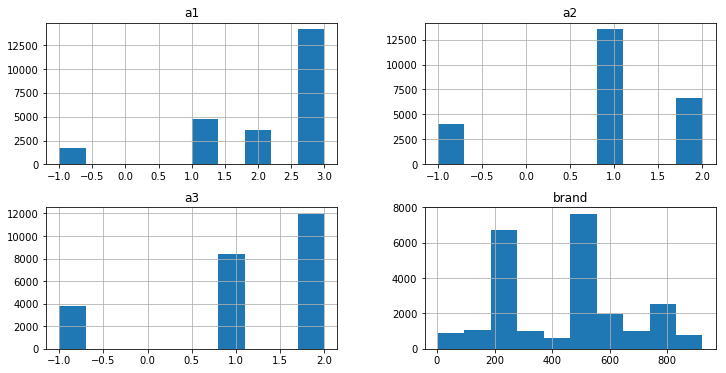

In [28]:
product_df[['a1','a2','a3','brand']].hist(figsize=[12,6])

In [49]:
action_df.sku_id.isin(product_df.sku_id).sum()/float(action_df.shape[0]) ## sku_id in Action in P

0.35824966558459576

In [40]:
product_df.sku_id.isin(comment_df.sku_id).sum()/float(product_df.shape[0]) ## sku_id in P has comment data

0.28238309835862241

## User Table

In [7]:
user_df = pd.read_csv(user_path,encoding="gbk",parse_dates=[-1])
user_df.head()

,user_id,age,sex,user_lv_cd,user_reg_tm
0,200001,56岁以上,2.0,5,2016-01-26
1,200002,-1,0.0,1,2016-01-26
2,200003,36-45岁,1.0,4,2016-01-26
3,200004,-1,2.0,1,2016-01-26
4,200005,16-25岁,0.0,4,2016-01-26


In [8]:
user_df.describe()

,user_id,sex,user_lv_cd
count,105321.000000,105318.000000,105321.000000
mean,252661.000000,1.112887,3.850030
std,30403.698188,0.955930,1.071505
min,200001.000000,0.000000,1.000000
25%,226331.000000,0.000000,3.000000
50%,252661.000000,2.000000,4.000000
75%,278991.000000,2.000000,5.000000
max,305321.000000,2.000000,5.000000


In [19]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103616 entries, 0 to 103615
Data columns (total 5 columns):
user_id        103616 non-null int64
age            103616 non-null object
sex            103616 non-null int64
user_lv_cd     103616 non-null int64
user_reg_dt    103616 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.0+ MB


In [18]:
user_df[user_df.sex.isnull()]

,user_id,age,sex,user_lv_cd,user_reg_tm
34072,234073,NaN,NaN,1,NaT
38905,238906,NaN,NaN,1,NaT
67704,267705,NaN,NaN,1,NaT


In [19]:
user_df.dropna(how="any",inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafb34e1b50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fafb33ac710>]], dtype=object)

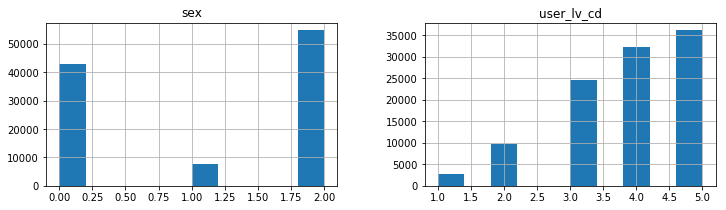

In [29]:
user_df[['sex','user_lv_cd']].hist(figsize=[12,3])

## Crawl User Cleaning

In [9]:
import gc
type_df = pd.get_dummies(action_df['type'], prefix='user_type')
user_type_count_df = pd.concat([action_df['user_id'], type_df], axis=1)
del type_df
user_type_count_df = user_type_count_df.groupby(['user_id'], as_index=False).sum()
gc.collect()

30

In [12]:
crawl_user = user_type_count_df[(user_type_count_df.user_type_4 == 0) & (user_type_count_df.user_type_3 == 0) & (user_type_count_df.user_type_2 == 0) & (user_type_count_df.user_type_5==0) &((user_type_count_df.user_type_6>800)|(user_type_count_df.user_type_1>400))].reset_index(drop=True)

In [13]:
crawl_user

,user_id,user_type_1,user_type_2,user_type_3,user_type_4,user_type_5,user_type_6
0,200376,761.0,0.0,0.0,0.0,0.0,0.0
1,201005,469.0,0.0,0.0,0.0,0.0,1015.0
2,201479,438.0,0.0,0.0,0.0,0.0,738.0
3,201663,554.0,0.0,0.0,0.0,0.0,781.0
4,203486,374.0,0.0,0.0,0.0,0.0,858.0
5,203612,436.0,0.0,0.0,0.0,0.0,616.0
6,204509,191.0,0.0,0.0,0.0,0.0,855.0
7,206151,413.0,0.0,0.0,0.0,0.0,692.0
8,207319,410.0,0.0,0.0,0.0,0.0,284.0
9,207781,491.0,0.0,0.0,0.0,0.0,517.0


In [14]:
crawl_user.to_csv('../data/crawl_user.csv',index=False)

## Cate8 Bought User

In [15]:
cate8_bought_user = action_df[(action_df.cate==8)&(action_df.type==4)].reset_index(drop=True)

In [19]:
cate8_bought_user.to_csv('../data/cate8_bought_user.csv',index=False)

## Low Potential User

In [46]:
low_potential_user = user_type_count_df[(user_type_count_df.user_type_4==0)&(user_type_count_df.user_type_2==0)].reset_index(drop=True)

In [47]:
low_potential_user

,user_id,user_type_1,user_type_2,user_type_3,user_type_4,user_type_5,user_type_6
0,200004,52.0,0.0,0.0,0.0,0.0,61.0
1,200006,182.0,0.0,0.0,0.0,4.0,183.0
2,200008,102.0,0.0,0.0,0.0,0.0,209.0
3,200009,11.0,0.0,0.0,0.0,0.0,0.0
4,200011,29.0,0.0,0.0,0.0,0.0,59.0
5,200012,76.0,0.0,0.0,0.0,0.0,114.0
6,200013,128.0,0.0,0.0,0.0,0.0,194.0
7,200019,28.0,0.0,0.0,0.0,1.0,69.0
8,200023,1.0,0.0,0.0,0.0,0.0,0.0
9,200026,5.0,0.0,0.0,0.0,0.0,7.0


In [48]:
low_potential_user.to_csv('../data/low_potential_user.csv',index=False)

In [71]:
test = joblib.load('../cache/train_set_2016-03-27_2016-04-11.set')